In [139]:
import pandas as pd
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
import numpy as np 
# pd.set_option('display.max_colwidth', None)
import ast
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
df = pd.read_csv('/Users/parthmalik/Desktop/UNSUPML_Project/recipe_ingredients_dataset/pca_kmeans_data.csv')

In [3]:
df['ingredients'] = df['ingredients'].apply(ast.literal_eval)

In [13]:
df_clusters = df[['id', 'cuisine', 'ingredients', 'Cluster50', 'Cluster80']]

In [7]:
print(df_clusters.head(2))

   id  cuisine  \
0   0  spanish   
1   1  mexican   

                                                                                                                                                                                                                                                                       ingredients  \
0                                                                                            [mussels, ground black pepper, garlic cloves, saffron threads, olive oil, stewed tomatoes, arborio rice, minced onion, medium shrimp, fat free less sodium chicken broth, green peas]   
1  [tomatoes, diced red onions, paprika, salt, corn tortillas, fresh cilantro, cremini, vegetable broth, freshly ground pepper, ground chipotle chile pepper, bell pepper, extra-virgin olive oil, yellow onion, ground cumin, poblano peppers, chili powder, garlic, pinto beans]   

   Cluster50  
0         40  
1         16  


In [67]:
df_clusters['ingredients'] = df['ingredients']

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_94427/4219592779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clusters['ingredients'] = df['ingredients']


In [9]:
pca_loadings = pd.read_csv('/Users/parthmalik/Desktop/UNSUPML_Project/recipe_ingredients_dataset/PCA_85_loadings.csv')

In [10]:
pca_loadings.rename(columns={'PCA': 'PRINCIPAL COMPONENT'}, inplace=True)

In [11]:
pca_loadings

,Unnamed: 0,alexia waffle fries,perciatelli,sweet and sour mix,corn bread crumbs,black cardamom pods,tumeric,fresh marjoram,sweet soy sauce,johnsonville hot & spicy breakfast links,gravy master,fresh chervil,arrow root,ground chile,whole wheat buns,knorr chicken stock pots,unsweetened coconut milk,american cheese slices,peas,ground dried shrimp,heirloom squash,fat free ice cream,stilton cheese,tuaca,yellow heirloom tomatoes,ginger syrup,lemon curd,broiler chicken,ginger,dried guajillo chiles,coriander,sardines,powdered sugar,refried beans,jimmies,tenderloin steaks,pita bread,low sodium vegetable juice cocktail,chinese black bean,cornish hens,low fat tortilla chip,blade steak,adobo style seasoning,crumbled corn bread,nonfat milk,domino light brown sugar,cassis,fideos pasta,smoked streaky bacon,fat skimmed chicken broth,...,reduced-fat sour cream,fruitcake,chocolate leaves,store-bought pound cake,challenge butter,peach sorbet,fresh basil,ground black pepper,whole wheat cereal,cookies,endive,turnips,italian turkey sausage links,pears,spinach tortilla,orange glaze,carnaroli rice,large marshmallows,jonshonville cajun style chicken sausage,lemon slices,organic soy sauce,gherkins,roast breast of chicken,wheat starch,miniature chocolate chips,oloroso sherry,white cake mix,chicken consomme,chopped walnuts,sorghum molasses,pastry cream,salsa verde,chicken pieces,frozen basil,raspberry preserves,tapioca,wasabi paste,turkey salami,pina colada mix,fresh salmon,extra virgin coconut oil,chive blossoms,satsuma imo,globe eggplant,frangipane,bee pollen,low sodium turkey breast,nonfat yogurt plain,oysters,nakano seasoned rice vinegar
0,PC1,-0.000028,-0.000022,-0.000165,-0.000003,0.000435,0.026786,0.000534,-0.000781,0.000043,-6.602674e-07,-0.000193,0.000021,-0.000021,-0.000017,-0.000020,-0.001406,0.000005,0.003875,0.000079,-0.000020,-0.000026,-0.000505,0.000006,-0.000026,1.108494e-06,-0.000197,-0.000018,0.006708,0.000124,0.010374,-0.000083,-0.008630,-0.004688,-0.000026,-0.000093,0.000529,0.000042,-0.000156,0.000022,-0.000093,-0.000017,7.032420e-06,-0.000034,-0.000035,-0.000097,-0.000042,0.000019,0.000045,0.002116,...,0.000734,0.000020,-0.000044,-4.770757e-05,-0.000044,-0.000049,0.009230,0.086325,-0.000035,-0.001265,-0.000034,0.002138,0.000005,-0.002669,-0.000039,0.000025,0.000235,-0.000125,9.204879e-07,-0.000829,-0.000031,-0.000075,-0.000048,-0.000039,-0.000042,-0.000084,-0.000695,0.000015,-0.000547,0.000019,-0.000157,-0.000052,0.002355,-0.000006,-0.000315,-0.000020,-0.001109,-0.000065,-0.000002,-0.000013,-0.000088,-0.000004,-0.000284,-0.000029,-0.000098,-0.000124,-0.000040,0.000388,0.000131,0.000041
1,PC2,-0.000019,-0.000368,-0.000013,-0.000057,-0.000348,-0.021539,-0.000837,-0.000399,-0.000009,1.144137e-05,-0.000194,0.000037,-0.000379,-0.000016,-0.000157,-0.002766,0.000041,-0.003430,-0.000065,-0.000038,0.000076,0.000462,0.000104,-0.000034,7.767114e-06,0.000230,-0.000060,-0.037173,-0.001097,-0.010272,-0.000276,0.038126,-0.005179,0.000064,0.000081,-0.001536,0.000016,-0.000090,-0.000138,-0.000194,-0.000117,-7.430007e-05,-0.000006,0.000038,0.000082,0.000004,-0.000074,-0.000188,-0.000610,...,-0.001439,0.000113,0.000040,2.382206e-05,0.000060,0.000019,-0.026714,-0.096485,0.000004,0.000915,-0.000028,-0.001457,-0.000130,0.001006,-0.000005,0.000112,-0.000077,0.000167,-9.698999e-05,0.000918,-0.000035,0.000061,-0.000129,0.000034,0.000076,0.000079,0.000548,-0.000087,0.006618,0.000078,0.000600,-0.003726,-0.001182,-0.000048,0.000465,0.000055,0.000293,-0.000029,-0.000058,0.000047,-0.000230,-0.000010,0.000090,-0.000126,0.000040,-0.000005,-0.000003,-0.000043,0.000664,-0.000009
2,PC3,-0.000025,-0.000466,-0.000050,-0.000029,0.000731,0.026802,-0.002805,0.002151,-0.000068,5.835756e-05,-0.000667,0.000024,0.000194,0.000023,-0.000097,0.003351,-0.000022,0.002004,0.000036,0.000019,0.000018,-0.000323,-0.000008,0.000033,6.951314e-07,-0.000072,-0.000103,0.133947,0.000116,0.013063,-0.000674,-0.004296,-0.000458,-0.000037,0.000066,-0.001697,-0.000002,0.000292,-0.000351,0.000120

# **CLUSTER CHARACTERISATION**

### **Cluster Naming Strategy**
- Dominant Cuisines: If a cluster is heavily dominated by one cuisine, the name could reflect this cuisine.
- Signature Ingredients: If certain ingredients are prevalent in a cluster, they could inspire a thematic or descriptive name.
- Culinary Themes: Sometimes clusters might represent broader culinary themes rather than specific cuisines or ingredients (e.g., 'spicy dishes', 'seafood specialties').

### **Cluster Size Distributions**

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_94427/3071661943.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_sizes_50.index, y=cluster_sizes_50.values, palette='viridis')


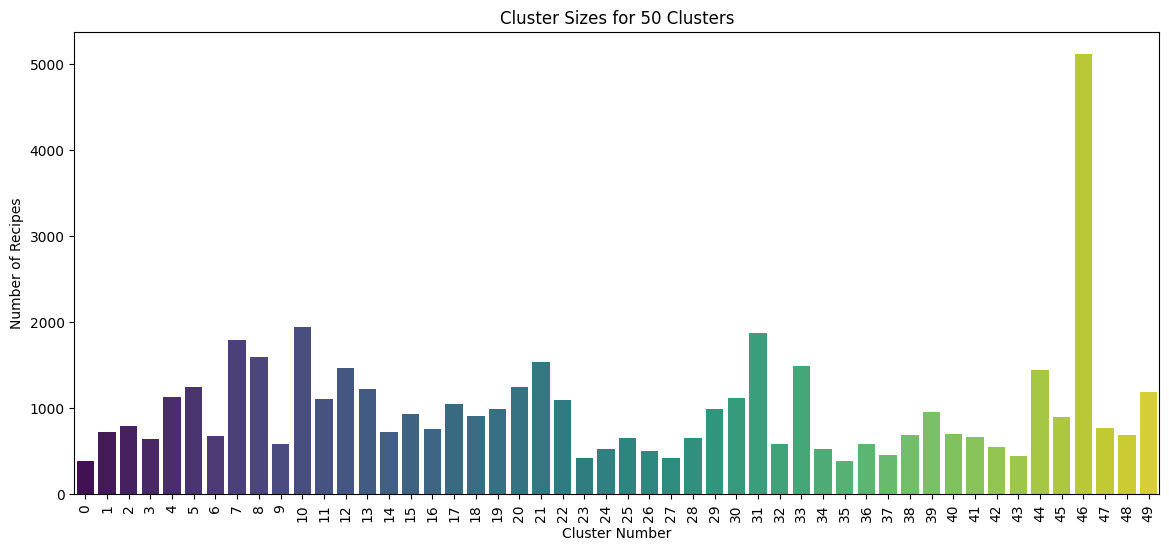

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_94427/3071661943.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_sizes_80.index, y=cluster_sizes_80.values, palette='viridis')


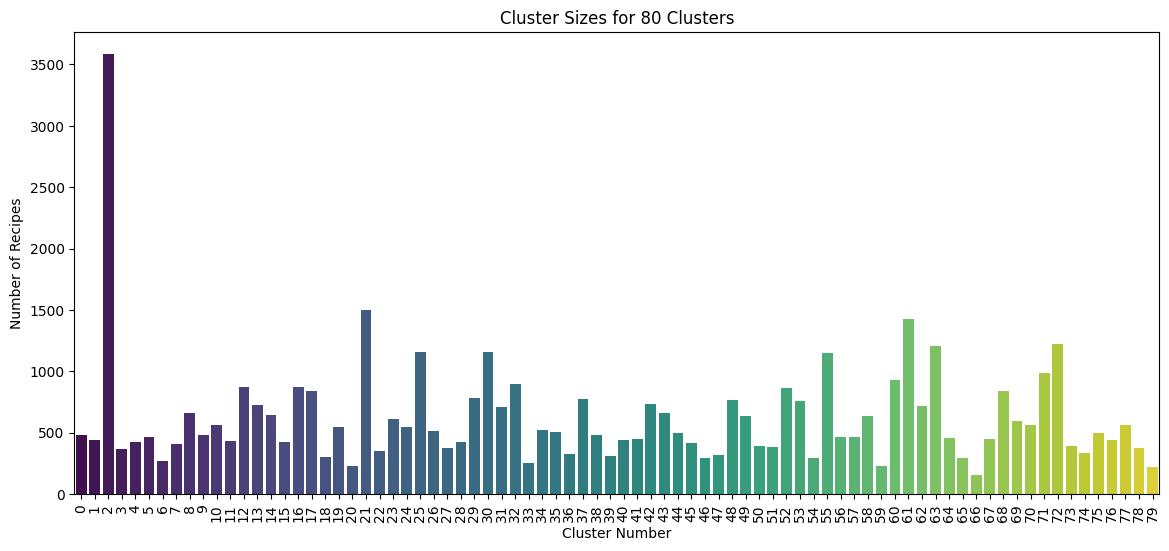

In [14]:
# Calculate the size of each cluster
cluster_sizes_50 = df_clusters['Cluster50'].value_counts()
cluster_sizes_80 = df_clusters['Cluster80'].value_counts()

# Cluster sizes for 50 clusters
plt.figure(figsize=(14, 6))
sns.barplot(x=cluster_sizes_50.index, y=cluster_sizes_50.values, palette='viridis')
plt.title('Cluster Sizes for 50 Clusters')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=90)  # Rotate x-labels for better visibility
plt.show()

# Cluster sizes for 80 clusters
plt.figure(figsize=(14, 6))
sns.barplot(x=cluster_sizes_80.index, y=cluster_sizes_80.values, palette='viridis')
plt.title('Cluster Sizes for 80 Clusters')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=90)  # Rotate x-labels for better visibility
plt.show()

### **As we can see, Clusters 46 and 2 in clustering runs with 50 and 80 clusters respectively are the **Dominant Clusters****

>> ## **Through elbow method, we visually and mathematically identified 50 and 80 as ideal cluster numbers. We explored how the recipes broke down based on both numbers, and saw adequate cluster distributions at each. For our purposes of understanding what recipe styles/ingredient groupings were in our clusters, 50 was not only more humanly feasible, but it also presented visually sufficient breakdowns to inform manual exploration**

In [15]:
# Group the data by Cluster50 and Cluster80, and then count the occurrences of each cuisine
cluster_cuisine_composition_50 = df_clusters.groupby('Cluster50')['cuisine'].value_counts(normalize=True) * 100
# cluster_cuisine_composition_80 = df_clusters.groupby('Cluster80')['cuisine'].value_counts(normalize=True) * 100

# Convert the series to a DataFrame for better readability
cluster_cuisine_composition_50_df = cluster_cuisine_composition_50.unstack(fill_value=0)
# cluster_cuisine_composition_80_df = cluster_cuisine_composition_80.unstack(fill_value=0)

In [16]:
cluster_cuisine_composition_50_df.reset_index(inplace=True)

In [ ]:
cluster_cuisine_composition_50_df.to_csv('/Users/parthmalik/Desktop/UNSUPML_Project/recipe_ingredients_dataset/cluster_cuisine_composition_50.csv')

### **Metric for setting a naming convention purely based on cuisine i.e. clusters which are superiorily denominated by a cuisine (Example 70% of erecipes are coming from that cuisine)**

In [ ]:
# df_clusters[(df_clusters['Cluster50'] == 46)] & ((df_clusters['cuisine'] == 'italian') | (df_clusters['cuisine'] == 'mexican'))]


In [17]:
cluster_cuisine_composition_50_df[cluster_cuisine_composition_50_df['Cluster50'] == 46]

cuisine,Cluster50,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
46,46,3.282532,3.126221,3.946854,5.080109,2.657288,6.193826,2.96991,5.216882,2.383744,15.7288,2.051583,5.334115,1.953888,15.885111,1.660805,1.758499,10.961313,2.774521,4.533021,2.500977


In [26]:
# Get the cluster sizes again
cluster_sizes_50 = df_clusters['Cluster50'].value_counts().sort_index()


actual_counts_50 = cluster_cuisine_composition_50_df.iloc[:, 1:].multiply(cluster_sizes_50, axis=0).div(100)

<Figure size 2000x1000 with 0 Axes>

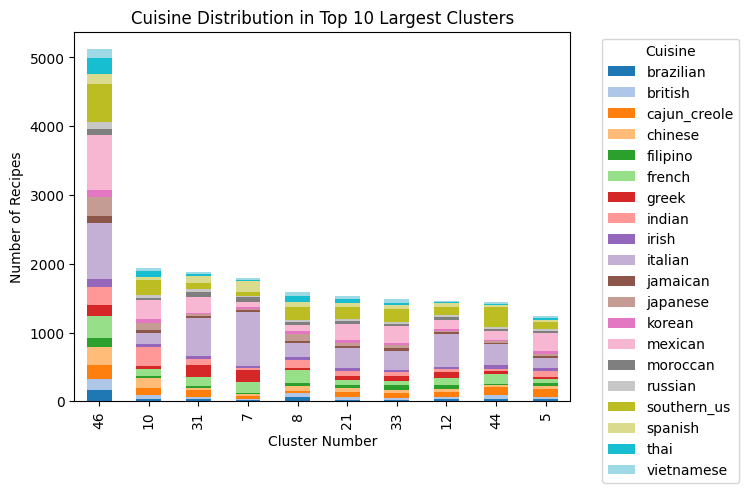

<Figure size 1200x600 with 0 Axes>

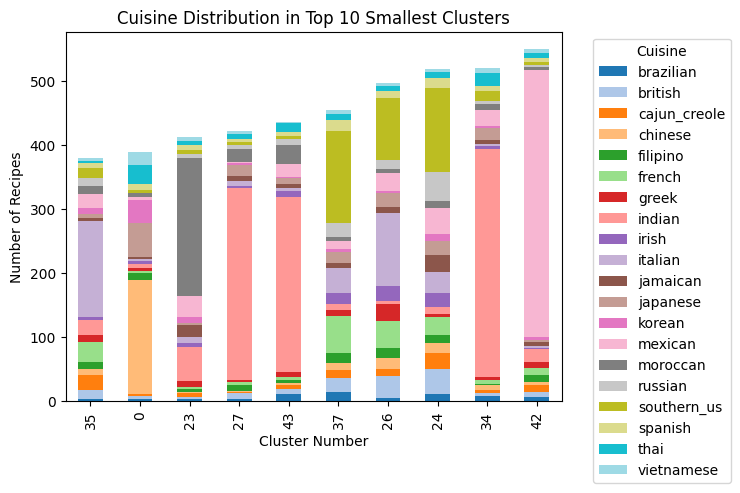

In [28]:
import matplotlib.pyplot as plt

# Find the top N and bottom N clusters by size
top_n = 10
bottom_n = 10

top_clusters = cluster_sizes_50.nlargest(top_n).index
bottom_clusters = cluster_sizes_50.nsmallest(bottom_n).index

# Filter the actual counts for the top and bottom clusters
top_clusters_data = actual_counts_50.loc[top_clusters]
bottom_clusters_data = actual_counts_50.loc[bottom_clusters]

if 'Cluster50' in actual_counts_50.columns:
    actual_counts_50 = actual_counts_50.drop('Cluster50', axis=1, inplace=True)

palette = sns.color_palette('tab20', n_colors=len(actual_counts_50.columns))

# Plot the data for the top clusters with the new color palette
plt.figure(figsize=(20, 10))
top_clusters_data.plot(kind='bar', stacked=True, color=palette)
plt.title('Cuisine Distribution in Top 10 Largest Clusters')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Recipes')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot the data for the bottom clusters with the new color palette
plt.figure(figsize=(12, 6))
bottom_clusters_data.plot(kind='bar', stacked=True, color=palette)
plt.title('Cuisine Distribution in Top 10 Smallest Clusters')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Recipes')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
 # Create a palette with enough colors
palette = sns.color_palette("tab20", n_colors=len(actual_counts_50.columns))

# Sort the clusters by size in descending order
sorted_cluster_indices = cluster_sizes_50.sort_values(ascending=False).index

# Define how many plots you want and the size of each group
num_plots = 5
clusters_per_plot = 10

# Create plots for each set of 10 clusters, based on sorted cluster sizes
for i in range(num_plots):
    # Calculate the rank range for the current plot
    rank_start = i * clusters_per_plot + 1
    rank_end = rank_start + clusters_per_plot - 1  # Adjust the end rank to be inclusive
    
    # Get the indices of the clusters to be plotted
    clusters_to_plot_indices = sorted_cluster_indices[i * clusters_per_plot : (i + 1) * clusters_per_plot]
    
    # Get the data for these clusters
    clusters_to_plot_data = actual_counts_50.loc[clusters_to_plot_indices]

    # Create the plot for the current group of clusters
    plt.figure(figsize=(20, 10))
    clusters_to_plot_data.plot(kind='bar', stacked=True, color=palette)
    
    # Use the rank range in the title to indicate the order of the clusters by size
    plt.title(f'Cuisine Distribution in Clusters Ranked {rank_start} to {rank_end} by Size')
    plt.xlabel('Cluster Number')
    plt.ylabel('Number of Recipes')
    
    # Set the x-ticks to show the actual cluster numbers
    cluster_labels = clusters_to_plot_indices.astype(str)
    plt.xticks(np.arange(clusters_per_plot), cluster_labels, rotation=45)
    
    plt.legend(title='CUISINE', bbox_to_anchor=(1.05, 1), loc='upper left')

    fig = plt.gcf()  # Get the current figure
    fig.set_size_inches(20, 10)  # Set the figure size

    # Adjust the layout to make space for the legend
    plt.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the rect parameter as needed
    
    # Define the filename based on the current rank range
    filename = f'cuisine_distribution_clusters_{rank_start}_to_{rank_end}.png'
    
    # Save the current figure to a .png file with high resolution
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

In [52]:
cluster_cuisine_composition_50_df.columns

actual_counts_50 = cluster_cuisine_composition_50_df.iloc[:, 1:].multiply(cluster_sizes_50, axis=0).div(100)
actual_counts_50.columns

Index(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french',
       'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean',
       'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai',
       'vietnamese'],
      dtype='object', name='cuisine')

In [57]:
actual_counts_50 = cluster_cuisine_composition_50_df.iloc[:, 1:].multiply(cluster_sizes_50, axis=0).div(100)

cluster_summary_data = []

# Loop through each cluster
for cluster in cluster_sizes_50.index:
    # Find the dominant cuisine and its percentage for the current cluster
    max_percentage_cuisine = cluster_cuisine_composition_50_df.loc[cluster].iloc[1:].idxmax()
    max_percentage = cluster_cuisine_composition_50_df.loc[cluster].iloc[1:].max()
    actual_count = actual_counts_50.loc[cluster][max_percentage_cuisine]

    # Append the information to our summary list
    cluster_summary_data.append({
        'cluster': cluster,
        'actual_count': int(actual_count),  # Convert to int for display purposes
        'total_count': cluster_sizes_50[cluster],
        'percentage': max_percentage,
        'cuisine_name': max_percentage_cuisine
    })

# Convert the summary data into a DataFrame
cluster_summary_df = pd.DataFrame(cluster_summary_data)

# Sort the DataFrame in descending order of the percentage
cluster_summary_df.sort_values(by='percentage', ascending=False, inplace=True)

In [59]:
cluster_summary_df.to_csv('/Users/parthmalik/Desktop/UNSUPML_Project/recipe_ingredients_dataset/cluster_summary_df.csv')

### **Getting unique ingredients of all clusters and adding that col to df**

In [71]:
unique_ingredients_by_cluster = {}
for cluster in df_clusters['Cluster50'].unique():
    # Filter the DataFrame for the current cluster
    cluster_data = df_clusters[df_clusters['Cluster50'] == cluster]
    
    # Concatenate all ingredient lists for the current cluster, then find unique ingredients
    unique_ingredients = set(ingredient for recipe_ingredients in cluster_data['ingredients'] for ingredient in recipe_ingredients)
    
    # Add the unique ingredients to the dictionary with the cluster number as the key
    unique_ingredients_by_cluster[cluster] = unique_ingredients



In [81]:
# Convert the keys of the dictionary from int64 to str
unique_ingredients_by_cluster_str = {str(cluster): ingredients for cluster, ingredients in unique_ingredients_by_cluster.items()}

# Save the dictionary to a JSON file
with open('unique.json', 'w') as json_file:
    json.dump(unique_ingredients_by_cluster_str, json_file)


In [97]:
cluster_summary_df.head(10)

,cluster,actual_count,total_count,percentage,cuisine_name
15,15,723,929,77.825619,mexican
42,42,417,550,75.818182,mexican
32,32,428,576,74.305556,indian
16,16,559,760,73.552632,mexican
1,1,530,722,73.407202,italian
27,27,300,422,71.090047,indian
14,14,513,725,70.758621,mexican
34,34,356,521,68.330134,indian
47,47,524,771,67.963684,chinese
43,43,274,437,62.700229,indian


In [83]:
cluster_cuisine_composition_50_df['unique_ingredients'] = pd.Series(unique_ingredients_by_cluster)

In [85]:
cluster_cuisine_composition_50_df.to_csv('/Users/parthmalik/Desktop/UNSUPML_Project/recipe_ingredients_dataset/cluster_cuisine_composition_50.csv')

# **Choosing Entropy over simple percentage dominance for naming clusters is a strategic decision that offers a more nuanced and informed approach to understanding the composition of each cluster. Here's why entropy can be a more sophisticated metric than plain percentages**:

### Reflects Overall Distribution:
- **Entropy takes into account the entire distribution** of cuisines within a cluster, rather than focusing solely on the most dominant cuisine. It provides a single value that summarizes how spread out the cuisines are, which can be especially informative for clusters without a single overwhelmingly dominant cuisine.

### Identifies Subtle Patterns:
- **It identifies subtler patterns** that percentages alone might miss. For instance, two clusters could have the same dominant cuisine at 40%, but one could have the remaining 60% split evenly among many cuisines (high entropy), while the other could have almost all of the rest in a second cuisine (low entropy). These are very different situations that simple percentages wouldn't distinguish.

### More than Just the Largest Group:
- **Not just the largest group matters**. Entropy emphasizes the importance of minority groups within the clusters. A cluster could be 45% one cuisine and 55% a mix of others. A simple majority rule would miss that nearly half the cluster doesn't fit the dominant category.

### Quantitative Measure of Diversity:
- **Entropy is a quantitative measure of diversity**. It provides a clear, calculable way to determine how varied a cluster is, which is crucial for recommendation systems that may want to suggest diverse options to users.

### Decision-Making Based on Data:
- **It allows for data-driven decision-making**. By using a consistent, mathematical approach, you can objectively categorize clusters based on their actual content rather than subjective impressions.

### Predictive Power:
- **Entropy has predictive power**. It helps to understand the predictability of a cluster. Low entropy means you can predict the cuisine of a new recipe added to the cluster with higher confidence, which can be important for user experience in a recommendation system.

By using entropy, we ensured that cluster naming is not arbitrary but is instead based on an all-encompassing view of each cluster's make-up. This results in names that accurately reflect the culinary landscape of your dataset, which can enhance the personalization and effectiveness of the recommendations you generate.

# **Explaining Entropy and Its Usage For our Naming Convention**

**Entropy** is a measure from information theory that quantifies the amount of uncertainty or randomness in a system. In the context of your clustering analysis, entropy measures the diversity or uniformity of cuisines within each cluster:

- **High Entropy**: Indicates that the cluster contains a diverse mix of cuisines. The recipes in these clusters do not predominantly belong to any single cuisine but are spread across many different cuisines. This high value implies greater uncertainty in predicting any single cuisine from this cluster because of the uniform distribution of various cuisines.
  
- **Low Entropy**: Implies that the cluster is dominated by one or a few cuisines. The recipes in these clusters are largely from a single cuisine, making it very predictable or certain what type of cuisine a randomly picked recipe from this cluster would belong to.


In [121]:
# Converting to decimal form
cuisine_proportions = cluster_cuisine_composition_50_df.iloc[:, 1:-1] / 100


In [122]:
cuisine_proportions

cuisine,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
0,0.007712,0.015424,0.005141,0.457584,0.028278,0.007712,0.015424,0.015424,0.012853,0.007712,0.007712,0.133676,0.095116,0.010283,0.015424,0.002571,0.012853,0.020566,0.079692,0.048843
1,0.009695,0.009695,0.027701,0.009695,0.008310,0.020776,0.020776,0.008310,0.005540,0.734072,0.012465,0.012465,0.020776,0.024931,0.004155,0.008310,0.023546,0.016620,0.013850,0.008310
2,0.012642,0.037927,0.031606,0.046776,0.015171,0.103666,0.032870,0.018963,0.016435,0.208597,0.010114,0.035398,0.025284,0.056890,0.017699,0.036662,0.219975,0.037927,0.021492,0.013906
3,0.032813,0.084375,0.040625,0.025000,0.026562,0.062500,0.021875,0.028125,0.040625,0.104688,0.018750,0.034375,0.020313,0.107813,0.014063,0.028125,0.268750,0.015625,0.010937,0.014063
4,0.015943,0.008857,0.069973,0.023915,0.018601,0.050487,0.062888,0.047830,0.021258,0.352524,0.025686,0.012400,0.014172,0.121346,0.025686,0.011515,0.033658,0.037201,0.026572,0.019486
5,0.024900,0.031325,0.093173,0.034538,0.029719,0.046586,0.025703,0.068273,0.032129,0.122892,0.022490,0.024096,0.029719,0.209639,0.024096,0.023293,0.081124,0.025703,0.027309,0.023293
6,0.007353,0.010294,0.004412,0.545588,0.044118,0.011765,0.016176,0.008824,0.002941,0.011765,0.014706,0.107353,0.075000,0.013235,0.004412,0.014706,0.013235,0.007353,0.044118,0.042647
7,0.010632,0.010632,0.024063,0.011192,0.010632,0.090655,0.094572,0.020145,0.013430,0.443760,0.011192,0.013990,0.011192,0.041970,0.037493,0.015109,0.032457,0.082820,0.012871,0.011192
8,0.038413,0.035264,0.017003,0.053526,0.023300,0.121537,0.019521,0.070529,0.023300,0.129723,0.017632,0.062972,0.030227,0.056675,0.023929,0.022670,0.122166,0.037154,0.055416,0.039043
9,0.006932,0.053726,0.057192,0.017331,0.022530,0.197574,0.032929,0.008666,0.041594,0.155979,0.017331,0.015598,0.015598,0.051993,0.010399,0.048527,0.209705,0.019064,0.005199,0.012132


### **Calculating Entropy for this df**

In [123]:
def calculate_entropy(proportions):
    """
    Calculate the entropy of a probability distribution.

    Parameters:
    proportions (numpy.ndarray): An array of proportions representing a probability distribution.

    Returns:
    float: The entropy value.

    """
    proportions = proportions[proportions > 0]  # ensure no zero or negative values for log calculation
    entropy = -np.sum(proportions * np.log2(proportions))
    return entropy

# Apply the entropy calculation to each row (cluster)
cluster_entropy = cuisine_proportions.apply(calculate_entropy, axis=1)

# Add the entropy values as a new column to the DataFrame
cluster_cuisine_composition_50_df['Entropy'] = cluster_entropy


In [129]:
entropies = cluster_cuisine_composition_50_df['Entropy'].to_list()

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_94427/1162368032.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_entropy, bins = 30, kde=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


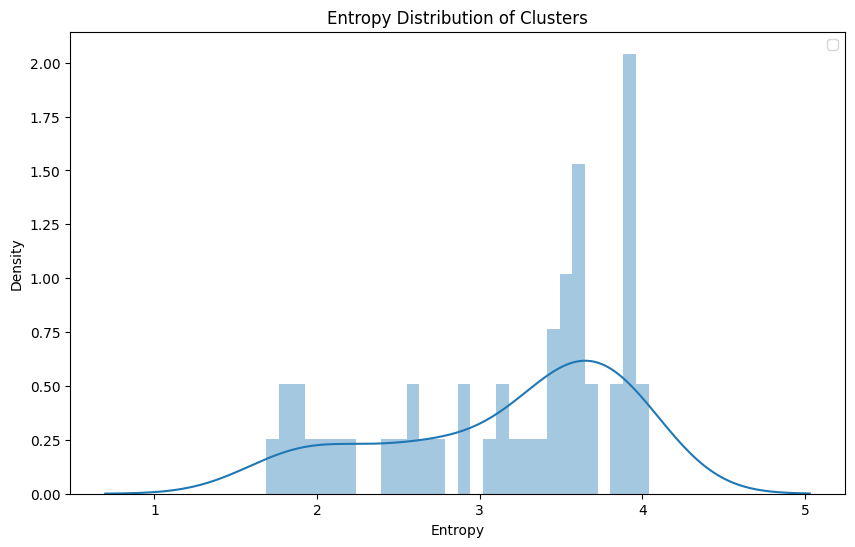

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the entropy distribution
plt.figure(figsize=(10, 6))
sns.distplot(cluster_entropy, bins = 30, kde=True)
plt.title('Entropy Distribution of Clusters')
plt.xlabel('Entropy')
plt.ylabel('Density')
# plt.axvline(x=dominance_threshold, color='r', linestyle='--', label='New Dominance Threshold')
# plt.axvline(x=diversity_threshold, color='g', linestyle='--', label='New Diversity Threshold')
plt.legend()
plt.show()


### **In the plot we can see the distribution of entropy across clusters. The thresholds for dominance and diversity are marked with dashed lines. Based on the visual, the aim is to set a dominance threshold where there is a clear drop-off in density, indicating fewer clusters with very low entropy (high dominance). The diversity threshold should similarly be set where there is a noticeable change in the distribution, marking the point at which clusters start to become substantially more diverse.**

- **New Dominance Threshold**: Should be set where there is an initial drop-off in density, before the first peak. This looks to be around the entropy value of `2.25`. Clusters to the left of this value have low entropy, meaning a single cuisine can be considered dominant.

- **New Diversity Threshold**: Should be set where the density starts to significantly decrease after the peak, which appears to be just beyond the entropy value of `3.82`. Clusters to the right of this value represent those with high diversity.

### **Based on this visual, a reasonable set of thresholds might be:**

- **Dominance Threshold**: Approximately 1.5 or slightly higher if you want to be stricter in defining a dominant cluster.
- **Diversity Threshold**: Around 3.5 could be a good starting point, considering that beyond this value, the density diminishes, indicating that clusters have a wide variety of cuisines.



In [197]:
cluster_cuisine_composition_50_df.drop('Cluster_type', axis=1, inplace=True)

dominance_threshold = 2.5
diversity_threshold = 3.82

# Define a function to determine the cluster name based on the entropy value
def get_cluster_name(row):
    entropy = row['Entropy']
    if entropy <= dominance_threshold:
        # Low entropy: Name after the most prevalent cuisine
        # Skip 'Cluster50' and 'Entropy' columns to get the cuisine percentages
        return row.iloc[1:-2].idxmax()
    elif entropy <= diversity_threshold:
        # Moderate entropy: Name as "Mixed"
        return 'Mixed'
    else:
        # High entropy: Name as "Diverse"
        return 'Diverse'

# Apply the function to each row in the DataFrame
cluster_cuisine_composition_50_df['Cluster_type'] = cluster_cuisine_composition_50_df.apply(get_cluster_name, axis=1)



In [198]:
cluster_cuisine_composition_50_df['Cluster_type'].value_counts()

Cluster_type
Mixed      29
Diverse    11
mexican     4
indian      4
italian     1
chinese     1
Name: count, dtype: int64

In [177]:
cluster_cuisine_composition_50_df['Cluster_type'].to_csv('/Users/parthmalik/Desktop/UNSUPML_Project/recipe_ingredients_dataset/cluster_types.csv')

In [180]:
cuisine_dom_clusters = cluster_cuisine_composition_50_df.sort_values(by='Entropy', ascending=False)['Cluster50'].tail(10)

In [201]:
cluster_cuisine_composition_50_df[['Cluster50', 'Entropy', 'Cluster_type']].sort_values(by='Entropy', ascending=False)

cuisine,Cluster50,Entropy,Cluster_type
29,29,4.039069,Diverse
8,8,4.016901,Diverse
46,46,3.931714,Diverse
10,10,3.930873,Diverse
49,49,3.928132,Diverse
13,13,3.903835,Diverse
5,5,3.893655,Diverse
11,11,3.891052,Diverse
21,21,3.890740,Diverse
19,19,3.890272,Diverse


# **Ingredient Based Naming for Mixed Type Clusters using WordCloud**

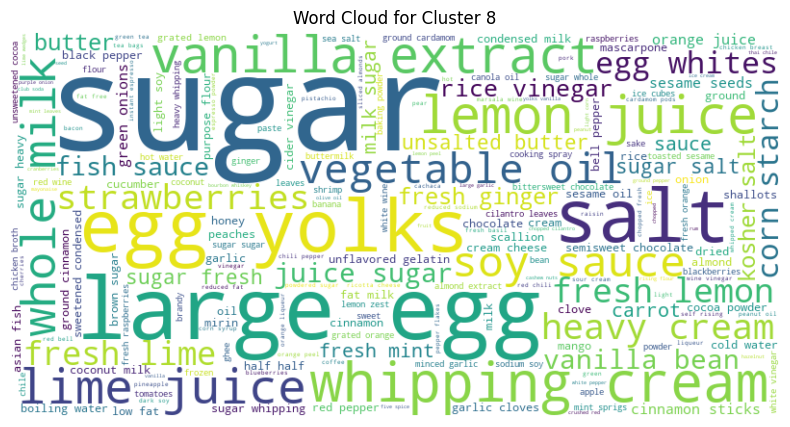

In [219]:
from wordcloud import WordCloud

cluster_number = 8
cluster_ingredients = all_check.loc[cluster_number, 'All_Ingredients']

# Generate the word cloud for the cluster's ingredients
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cluster_ingredients))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title(f'Word Cloud for Cluster {cluster_number}')
plt.show()


# --> BAKING

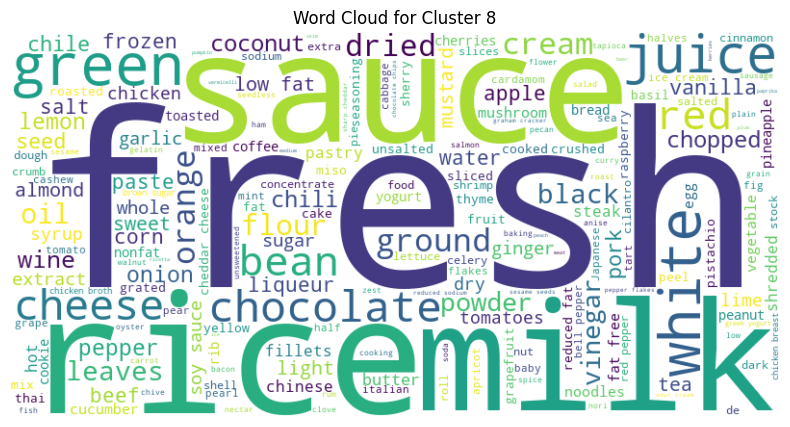

In [220]:
from wordcloud import WordCloud

cluster_number = 8
cluster_ingredients = cluster_cuisine_composition_50_df.loc[cluster_number, 'unique_ingredients']

# Generate the word cloud for the cluster's ingredients
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cluster_ingredients))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title(f'Word Cloud for Cluster {cluster_number}')
plt.show()

In [226]:
def generate_wordclouds_for_all_clusters(df, ingredient_column='All_Ingredients'):
    # Create a word cloud for each cluster in the DataFrame
    for cluster_id, cluster_data in df.iterrows():
        # Join all the ingredients from the column into a single string
        ingredients_text = ' '.join(cluster_data[ingredient_column])
        
        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_text)
        
        # Set up the plot
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Hide the axes
        plt.title(f'Word Cloud for Cluster {cluster_id}')
        
        # Save the figure to a file in the current directory
        plt.savefig(f'Cluster{cluster_id}.png')
        
        # Close the plot after saving to free up memory
        plt.close()




In [228]:
# Call the function with your DataFrame and the column containing the ingredient lists
generate_wordclouds_for_all_clusters(cluster_cuisine_composition_50_df, ingredient_column='unique_ingredients')

In [206]:
all_ingredients_by_cluster = {}
for cluster in df_clusters['Cluster50'].unique():
    # Filter the DataFrame for the current cluster
    cluster_data = df_clusters[df_clusters['Cluster50'] == cluster]
    
    # Concatenate all ingredient lists for the current cluster
    all_ingredients = [ingredient for recipe_ingredients in cluster_data['ingredients'] for ingredient in recipe_ingredients]
    
    # Add the aggregated ingredients to the dictionary with the cluster number as the key
    all_ingredients_by_cluster[cluster] = all_ingredients



In [231]:
all_check = cluster_cuisine_composition_50_df[['Cluster50', 'Entropy', 'Cluster_type']]
all_check

cuisine,Cluster50,Entropy,Cluster_type
0,0,2.869756,Mixed
1,1,1.919318,italian
2,2,3.642507,Mixed
3,3,3.694419,Mixed
4,4,3.457926,Mixed
5,5,3.893655,Diverse
6,6,2.611635,Mixed
7,7,3.067694,Mixed
8,8,4.016901,Diverse
9,9,3.518721,Mixed


# Creating Word Clouds Based on Non Unique Ingredients

In [210]:
# First, ensure df_clusters has a 'Cluster50' column to merge on
all_check['All_Ingredients'] = all_check['Cluster50'].map(all_ingredients_by_cluster)


/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_94427/695907448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_check['All_Ingredients'] = all_check['Cluster50'].map(all_ingredients_by_cluster)


In [211]:
all_check

cuisine,Cluster50,Entropy,Cluster_type,All_Ingredients
0,0,2.869756,Mixed,"[ground black pepper, crushed red pepper, corn starch, wasabi paste, wax beans, all-purpose flour, fresh lime juice, ground ginger, vegetable oil, salt, green beans, low sodium soy sauce, ice water, firm tofu, peeled fresh ginger, crushed red pepper, baby greens, sesame oil, garlic cloves, green onions, rice vinegar, reduced sodium soy sauce, vegetable oil, fresh ginger root, garlic cloves, crushed red pepper flakes, sesame oil, sliced green onions, low sodium soy sauce, rice vinegar, low sodium soy sauce, soy milk, vegetable oil, grated lemon zest, ground round, peeled fresh ginger, salt, corn starch, red chili peppers, green onions, all-purpose flour, Thai fish sauce, fresh basil, water chestnuts, light coconut milk, dark sesame oil, low sodium soy sauce, cooking spray, salt, sugar, chicken drumsticks, fresh ginger, fresh orange juice, sake, green onions, fresh lemon juice, water, oyster mushrooms, freshly ground pepper, bok choy, low sodium soy sauce, sherry, salt, corn starch, canola oil, chicken stock, fresh ginger, crushed red pepper, garlic cloves, boneless skinless chicken breast halves, sugar, sesame oil, rice vinegar, red bell pepper, fresh spinach, dark sesame oil, sesame seeds, kosher salt, garlic cloves, low sodium soy sauce, green onions, low sodium soy sauce, peeled fresh ginger, salt, black pepper, vegetable oil, sugar, shallots, lettuce leaves, dry sherry, water, red pepper flakes, brown sugar, flank steak, corn starch, low sodium soy sauce, green onions, ginger, minced garlic, vegetable oil, ...]"
1,1,1.919318,italian,"[chicken broth, finely chopped onion, water, dry white wine, pernod, grated parmesan cheese, frozen chopped spinach, olive oil, long-grain rice, grated parmesan cheese, linguine, margarine, chicken broth, chicken breast halves, all-purpose flour, fresh mushrooms, fontina cheese, half & half, salt, chopped onion, minced garlic, dry sherry, dry bread crumbs, ground white pepper, ziti, juice, olive oil, dry red wine, onions, grated parmesan cheese, Italian turkey sausage, diced tomatoes, red bell pepper, dijon mustard, large garlic cloves, orecchiette, olive oil, fresh shiitake mushrooms, low salt chicken broth, grated parmesan cheese, peas, radicchio, red wine vinegar, white mushrooms, grated parmesan cheese, garlic powder, diced tomatoes, boneless skinless chicken breasts, Swanson Chicken Broth, italian seasoning, fennel bulb, thyme, coarse salt, grated parmesan cheese, ground pepper, softened butter, tomato basil sauce, grated parmesan cheese, fresh basil leaves, shredded mozzarella cheese, cooked chicken, DeLallo Penne Ziti, bacon, grated parmesan cheese, heavy whipping cream, tortellini, egg yolks, olive oil, roasted garlic, noodles, tomatoes, crimini mushrooms, red bell pepper, grated parmesan cheese, fresh oregano, fresh rosemary, tapenade, fresh asparagus, dough, olive oil flavored cooking spray, prosciutto, grated parmesan cheese, fresh rosemary, penn pasta, cook and drain, broccoli florets, dri basil leaves, crush, garlic, ground black pepper, swanson chicken broth, grated parmesan cheese, lemon juice, ragu old world style pasta sauc, shredded mozzarella cheese, ricotta cheese, ground beef, grated parmesan cheese, rotini, dri oregano leaves, crush, grated parmesan cheese, dry sherry, ...]"
2,2,3.642507,Mixed,"[whole milk, fine sea salt, vanilla sugar, lemon, hazelnuts, baking powder, all-purpose flour, large eggs, extra-virgin olive oil, capers, cooking spray, anchovy fillets, fresh lemon juice, green bell pepper, tuna steaks, Niçoise olives, green beans, tomatoes, large eggs, vinaigrette, small red potato, romaine lettuce, watercress, freshly ground pepper, crawfish, ground red pepper, salt, eggplant, vegetable oil, sauce, milk, baking powder, all-purpose flour, large eggs, chopped celery, chopped onion, large eggs, scallions, chopped cilantro, light brown sugar, large garlic cloves, bird chile, asian fish sauce,

# Based on Cuine Analysis and Ingredient Analysis All Clusters have been named now and file stored as `"naming.json"`

In [238]:
# Initial Type identification with cols named by cuisine names which had entropy lower than the threshhold
Final_DF = cluster_cuisine_composition_50_df[['Cluster50', 'Entropy', 'Cluster_type']]

with open('naming.json', 'r') as file:
    cluster_names = pd.read_json(file)

name_dict = cluster_names.iloc[0].to_dict()

Final_DF['Cluster_Names'] = Final_DF['Cluster50'].map(name_dict)

/var/folders/jb/rytm79zx10zcs2wb4zr2ptxr0000gn/T/ipykernel_94427/4184908328.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_DF['Cluster_Names'] = Final_DF['Cluster50'].map(name_dict)


In [241]:
Final_DF.to_csv('Cluster_Names.csv')